In [49]:
import pandas as pd
import numpy as np
import pickle


In [50]:
df=pd.read_csv("quikr_car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [51]:
df.shape

(892, 6)

In [52]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [53]:
backup=df.copy()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [55]:
df=df.dropna()

In [56]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [57]:
np.unique(df.company)

array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [58]:
np.unique(df.year)

array(['1995', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'], dtype=object)

In [59]:
df['year']=df['year'].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    int32 
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.5+ KB


In [61]:
np.unique(df.Price)

array(['1,00,000', '1,05,000', '1,10,000', '1,14,990', '1,15,000',
       '1,20,000', '1,23,000', '1,25,000', '1,30,000', '1,35,000',
       '1,40,000', '1,45,000', '1,49,000', '1,50,000', '1,55,000',
       '1,55,555', '1,58,400', '1,59,000', '1,59,500', '1,60,000',
       '1,62,000', '1,65,000', '1,68,000', '1,69,500', '1,69,999',
       '1,70,000', '1,74,999', '1,75,000', '1,78,000', '1,79,000',
       '1,79,999', '1,80,000', '1,82,000', '1,85,000', '1,88,000',
       '1,89,000', '1,89,500', '1,89,700', '1,90,000', '1,95,000',
       '1,99,000', '1,99,999', '10,00,000', '10,25,000', '10,65,000',
       '10,74,999', '10,75,000', '11,30,000', '11,50,000', '12,00,000',
       '12,25,000', '12,99,000', '13,50,000', '14,00,000', '14,75,000',
       '14,90,000', '14,99,000', '15,00,000', '15,10,000', '15,25,000',
       '15,40,000', '15,99,000', '16,00,000', '17,25,000', '18,50,000',
       '18,91,111', '19,00,000', '2,00,000', '2,05,000', '2,09,000',
       '2,10,000', '2,15,000', '2,19,

In [62]:
df=df[df['Price']!='Ask For Price']

In [63]:
df['Price']=df['Price'].str.replace(",","").astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [65]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(",","").astype(int)
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 816, dtype: int32

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [67]:
np.unique(df.fuel_type)

array(['Diesel', 'LPG', 'Petrol'], dtype=object)

In [68]:
df.shape

(816, 6)

In [69]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [70]:
df=df[df['Price']<=600000]

In [71]:
df.describe()

,year,Price,kms_driven
count,693.000000,693.000000,693.000000
mean,2012.080808,278381.956710,47221.626263
std,4.054091,150033.861443,34224.349558
min,1995.000000,30000.000000,0.000000
25%,2010.000000,155555.000000,29000.000000
50%,2013.000000,260000.000000,42000.000000
75%,2015.000000,385000.000000,58000.000000
max,2019.000000,600000.000000,400000.000000


In [72]:
df['name']=df['name'].str.split().str.slice(0,3).str.join(' ')

C:\Users\khars\AppData\Local\Temp\ipykernel_13116\3730538541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name']=df['name'].str.split().str.slice(0,3).str.join(' ')


In [73]:
df.shape

(693, 6)

In [74]:
df=df.reset_index(drop=True)

In [75]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
688,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
689,Tata Indica V2,Tata,2009,110000,30000,Diesel
690,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
691,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

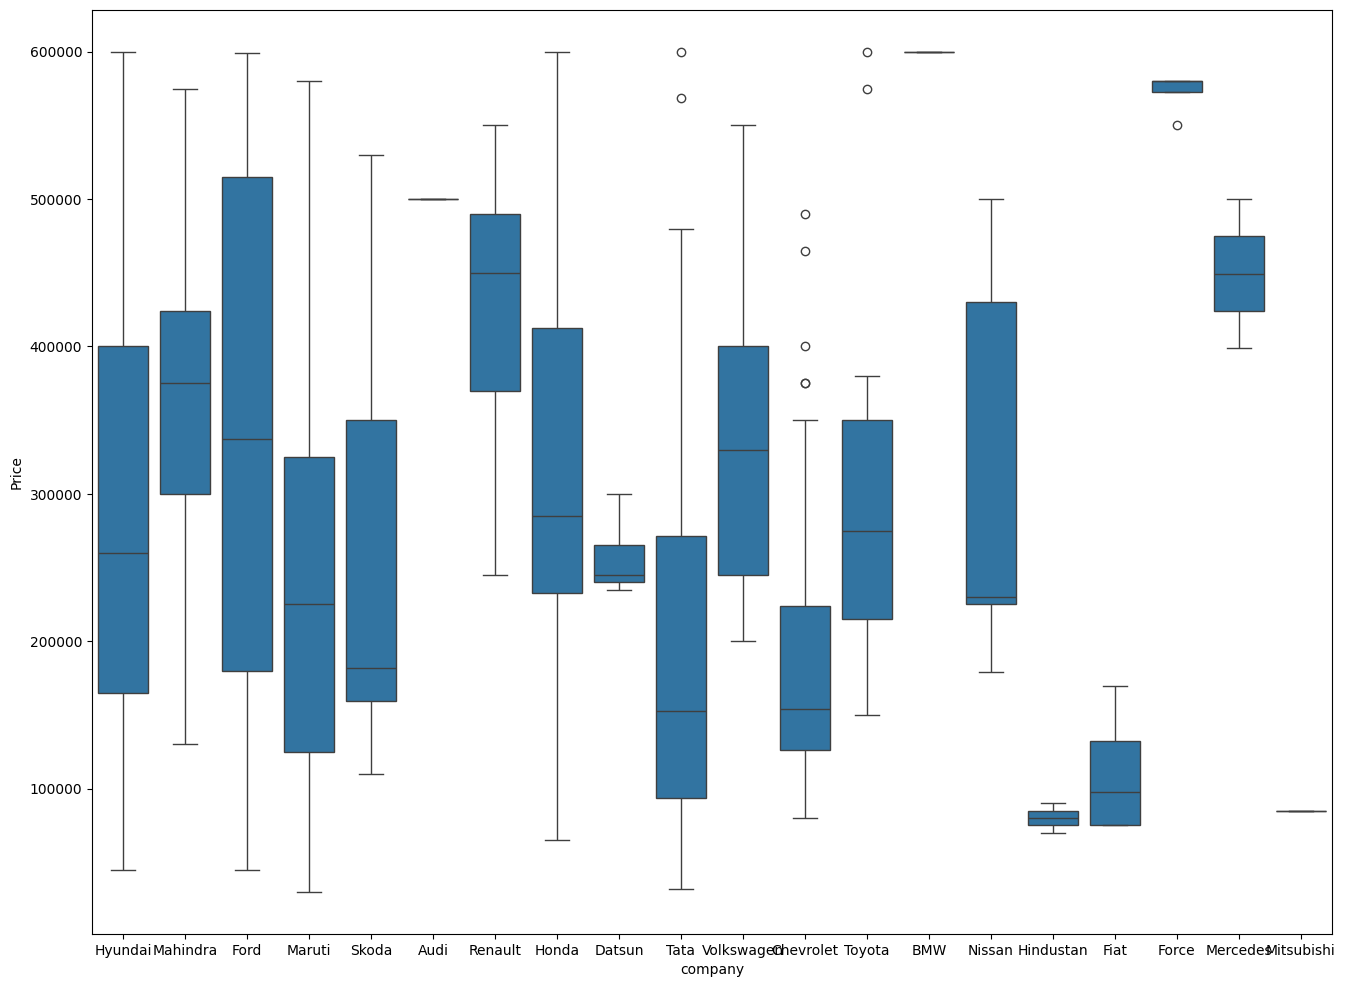

In [77]:
plt.subplots(figsize=(16,12))
ax=sns.boxplot(x='company',y='Price',data=df)
plt.show()

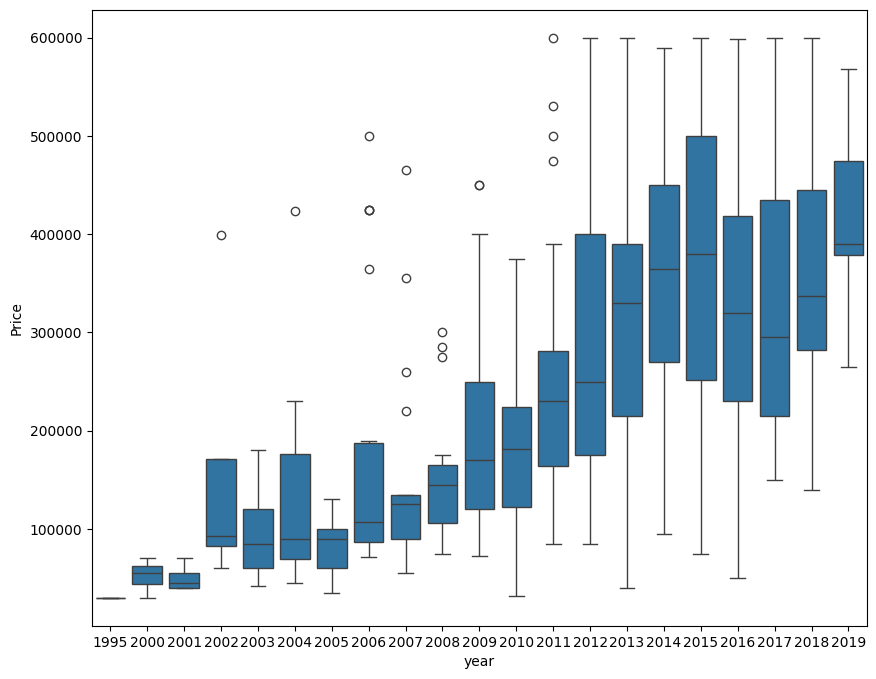

In [78]:
plt.subplots(figsize=(10,8))
ax=sns.boxplot(x='year',y='Price',data=df)
plt.show()

<Axes: xlabel='fuel_type', ylabel='Price'>

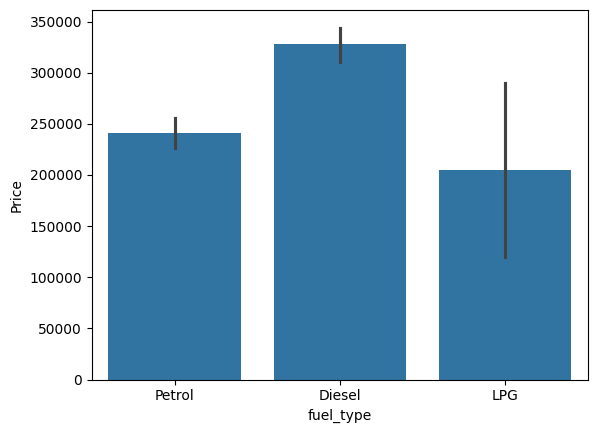

In [79]:
sns.barplot(x='fuel_type',y='Price',data=df)

Text(0, 0.5, 'KmsDriven')

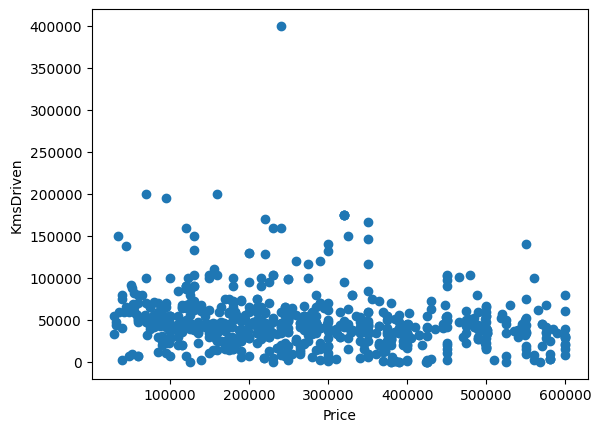

In [80]:
plt.scatter(x='Price',y='kms_driven',data=df)
plt.xlabel("Price")
plt.ylabel("KmsDriven")

In [81]:
df['name'].unique()

array(['Hyundai Santro Xing', 'Mahindra Jeep CL550', 'Hyundai Grand i10',
       'Ford EcoSport Titanium', 'Ford Figo', 'Hyundai Eon',
       'Maruti Suzuki Alto', 'Skoda Fabia Classic',
       'Maruti Suzuki Stingray', 'Hyundai Elite i20',
       'Mahindra Scorpio SLE', 'Audi Q7', 'Mahindra Scorpio S10',
       'Hyundai i20 Sportz', 'Maruti Suzuki Vitara', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon',
       'Skoda Yeti Ambition', 'Maruti Suzuki Baleno',
       'Renault Duster 110', 'Renault Duster 85', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda Amaze 1.5',
       'Honda City', 'Datsun Redi GO', 'Maruti Suzuki SX4',
       'Honda City ZX', 'Tata Indigo eCS', 'Volkswagen Polo Highline',
       'Chevrolet Spark LS', 'Renault Duster 110PS', 'Skoda Fabia 1.2L',
       'Renault Duster', 'Mahindra Quanto C8', 'Ford EcoSport',
       'Honda Brio', 'Hyundai i20 Magna', 'Toyota Corolla Altis',
       'Hyundai Verna Transform', 'BMW 3 Seri

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        693 non-null    object
 1   company     693 non-null    object
 2   year        693 non-null    int32 
 3   Price       693 non-null    int32 
 4   kms_driven  693 non-null    int32 
 5   fuel_type   693 non-null    object
dtypes: int32(3), object(3)
memory usage: 24.5+ KB


In [84]:
encoder=LabelEncoder()

In [85]:
df['fuel_type']=encoder.fit_transform(df['fuel_type'])

In [86]:
df['name']=encoder.fit_transform(df['name'])

In [87]:
df['company']=encoder.fit_transform(df['company'])

In [88]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,75,9,2007,80000,45000,2
1,97,10,2006,425000,40,0
2,72,9,2014,325000,28000,2
3,27,6,2014,575000,36000,0
4,31,6,2012,175000,41000,0


In [89]:
x=df.drop(columns = ['Price'])
y=df['Price']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=44)

In [91]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [92]:
print(model.coef_,model.intercept_)

[-6.52528760e+02  6.48683598e+03  1.73434473e+04 -7.87856057e-01
 -3.57319577e+04] -34539321.52692574


In [93]:
y_pred=model.predict(x_test)

In [94]:
print("r2 score : ",r2_score(y_test,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score :  0.3615655900656426
RMSE :  115683.52166266346


In [96]:
file_name='car_price.pkl'
pickle.dump(model,open(file_name,'wb'))

In [95]:
df.head(4)

,name,company,year,Price,kms_driven,fuel_type
0,75,9,2007,80000,45000,2
1,97,10,2006,425000,40,0
2,72,9,2014,325000,28000,2
3,27,6,2014,575000,36000,0


In [108]:
name = 'Hyundai Santro Xing'
company = 'Hyundai'
year = 2010
kms_driven = 4000
fuel_type = 'Diesel'

predicted_price = predict_car_price(model, name, company, year, kms_driven,fuel_type)
print(f"Predicted price for {name} of company {company}. Purchased in  {year} and driven {kms_driven}km has fuel type {fuel_type} : Rs. {predicted_price:.2f}")

Predicted price for Hyundai Santro Xing of company Hyundai. Purchased in  2010 and driven 4000km has fuel type Diesel : Rs. 317856.14


c:\Users\khars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
# Step 7: Code for User Input to Predict Car Prices
def predict_car_price(model, name, company, year, kms_driven,fuel_type):
    car_name_encoded = encoder.fit_transform([name])[0]
    company_encoded = encoder.fit_transform([company])[0]
    fuel_encoded = encoder.fit_transform([fuel_type])[0]
    features = [[car_name_encoded, company_encoded, year, kms_driven,fuel_encoded]]
    price_prediction = model.predict(features)[0]
    return price_prediction

#df['company']=encoder.fit_transform(df['company'])

In [ ]:
Hyundai Santro Xing	Hyundai	2007	80000	45000	Petrol